# 30 Day Map Challenge

## Day 13 - Chloropleth

Plan: Plot countries based on number of album sales by Taylor Swift

Setting up the notebook

In [1]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
px.defaults.width = 1300
px.defaults.height = 800

In [2]:
os.getcwd()
os.chdir("c:\\Users\\vicks\\OneDrive\\Data Science (not uni)\\Portfolio\\30 Day Map Challenge\\2023 data\\Day 13")

In [3]:
Countries = gpd.read_file("world-administrative-boundaries.shp")
Countries.head()

iso3        status color_code                                        name  \
0   UGA  Member State        UGA                                      Uganda   
1   UZB  Member State        UZB                                  Uzbekistan   
2   IRL  Member State        IRL                                     Ireland   
3   ERI  Member State        ERI                                     Eritrea   
4  None  UK Territory        GBR  South Georgia & the South Sandwich Islands   

    continent           region iso_3166_1_  \
0      Africa   Eastern Africa          UG   
1        Asia     Central Asia          UZ   
2      Europe  Northern Europe          IE   
3      Africa   Eastern Africa          ER   
4  Antarctica             None        None   

                                  french_shor  \
0                                     Ouganda   
1                                 Ouzbékistan   
2                                     Irlande   
3                                    Érythrée   
4  South Georgia & the South Sandwich Islands   

                                            geometry  
0  POLYGON ((33.92110 -1.00194, 33.92027 -1.00111...  
1  POLYGON ((70.97081 42.25467, 70.98054 42.26205...  
2  MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53...  
3  MULTIPOLYGON (((40.13583 15.75250, 40.12861 15...  
4  MULTIPOLYGON (((-26.24361 -58.49473, -26.24889...

In [4]:
Countries[Countries.values == "USA"]

iso3                           status color_code  \
69    VIR  US Non-Self-Governing Territory        USA   
95   None                     US Territory        USA   
122   PRI                     US Territory        USA   
147  None                     US Territory        USA   
173   MNP                     US Territory        USA   
211  None                     US Territory        USA   
222   USA                     Member State        USA   
222   USA                     Member State        USA   

                             name continent            region iso_3166_1_  \
69   United States Virgin Islands  Americas         Caribbean          VI   
95                     Guantanamo  Americas         Caribbean        None   
122                   Puerto Rico  Americas         Caribbean          PR   
147                    Midway Is.  Americas  Northern America        None   
173      Northern Mariana Islands   Oceania        Micronesia          MP   
211                 Jarvis Island  Americas  Northern America        None   
222      United States of America  Americas  Northern America          US   
222      United States of America  Americas  Northern America          US   

                      french_shor  \
69   United States Virgin Islands   
95                     Guantanamo   
122                   Puerto Rico   
147                    Midway Is.   
173      Northern Mariana Islands   
211                 Jarvis Island   
222         États-Unis d'Amérique   
222         États-Unis d'Amérique   

                                              geometry  
69   MULTIPOLYGON (((-64.76418 17.77861, -64.75598 ...  
95   MULTIPOLYGON (((-75.22373 19.90155, -75.22696 ...  
122  MULTIPOLYGON (((-65.44139 18.09028, -65.52501 ...  
147  POLYGON ((-177.38806 28.18638, -177.39334 28.1...  
173  MULTIPOLYGON (((145.63331 14.91236, 145.62412 ...  
211  POLYGON ((-160.02114 -0.39806, -160.02811 -0.3...  
222  MULTIPOLYGON (((-155.00558 19.32888, -155.1453...  
222  MULTIPOLYGON (((-155.00558 19.32888, -155.1453...

In [5]:
Countries = Countries.rename({'name': 'Country'}, axis = 'columns')

In [6]:
Countries = Countries[['Country','geometry']]
Countries

Country  \
0                                        Uganda   
1                                    Uzbekistan   
2                                       Ireland   
3                                       Eritrea   
4    South Georgia & the South Sandwich Islands   
..                                          ...   
251                                    Slovakia   
252                                        Mali   
253                                     Armenia   
254                                     Albania   
255                                   Gibraltar   

                                              geometry  
0    POLYGON ((33.92110 -1.00194, 33.92027 -1.00111...  
1    POLYGON ((70.97081 42.25467, 70.98054 42.26205...  
2    MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53...  
3    MULTIPOLYGON (((40.13583 15.75250, 40.12861 15...  
4    MULTIPOLYGON (((-26.24361 -58.49473, -26.24889...  
..                                                 ...  
251  POLYGON ((22.55805 49.07944, 22.55166 49.03943...  
252  POLYGON ((-4.80611 25.00027, -4.52528 24.82500...  
253  POLYGON ((46.54038 38.87559, 46.51639 38.87804...  
254  POLYGON ((20.07142 42.56091, 20.10208 42.53347...  
255  POLYGON ((-5.35580 36.16331, -5.33451 36.16256...  

[256 rows x 2 columns]

In [7]:
Tswift = pd.read_csv("Taylor Sales.csv")
Tswift.head()

Country      Sales  Albums counted
0  Australia  2135000.0               9
1    Austria    70000.0               3
2    Belgium   285000.0               7
3     Brazil    80000.0               3
4     Canada  2479000.0              12

In [8]:
TSData = Countries.merge(Tswift, #map_df merge to df
 left_on=['Country'], 
 right_on=['Country'])
TSData

Country  \
0                                      Ireland   
1                                        Spain   
2                                  Switzerland   
3                                      Austria   
4                                       Canada   
5                                       Poland   
6                                        Italy   
7                                    Australia   
8                            Republic of Korea   
9                                      Germany   
10                                   Venezuela   
11  U.K. of Great Britain and Northern Ireland   
12                                   Singapore   
13                                       Japan   
14                                      Brazil   
15                                      France   
16                                       China   
17                                      Sweden   
18                                 New Zealand   
19                    United States of America   
20                                      Norway   
21                                     Denmark   
22                                     Belgium   
23                                      Mexico   
24                                 Netherlands   

                                             geometry       Sales  \
0   MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53...     52500.0   
1   MULTIPOLYGON (((-17.91125 27.77375, -17.96389 ...     60000.0   
2   POLYGON ((9.56672 47.54045, 9.55980 47.50209, ...     10000.0   
3   POLYGON ((16.94618 48.61907, 16.94333 48.57333...     70000.0   
4   MULTIPOLYGON (((-66.87528 44.61944, -66.88612 ...   2479000.0   
5   POLYGON ((19.62726 54.46327, 19.65111 54.45583...     50000.0   
6   MULTIPOLYGON (((15.52889 38.13694, 15.50361 38...    150000.0   
7   MULTIPOLYGON (((158.88217 -54.71139, 158.87966...   2135000.0   
8   MULTIPOLYGON (((126.62221 33.23999, 126.59943 ...     25006.0   
9   MULTIPOLYGON (((14.22555 53.92860, 14.21583 53...    600000.0   
10  MULTIPOLYGON (((-61.18507 8.49674, -61.19417 8...      5000.0   
11  MULTIPOLYGON (((-1.05972 50.68749, -1.16833 50...   4900000.0   
12  POLYGON ((103.95997 1.32083, 103.84192 1.25903...    110000.0   
13  MULTIPOLYGON (((123.87289 24.25389, 123.86194 ...    800000.0   
14  MULTIPOLYGON (((-48.55056 -27.82139, -48.55667...     80000.0   
15  MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6...    250000.0   
16  MULTIPOLYGON (((110.71583 20.06888, 110.77859 ...   8904569.0   
17  MULTIPOLYGON (((16.43722 56.21139, 16.42972 56...     40000.0   
18  MULTIPOLYGON (((169.18552 -52.57695, 169.16166...    277500.0   
19  MULTIPOLYGON (((-155.00558 19.32888, -155.1453...  53760000.0   
20  MULTIPOLYGON (((5.28778 59.21889, 5.25597 59.1...    160000.0   
21  MULTIPOLYGON (((11.51389 54.82972, 11.56444 54...    170000.0   
22  POLYGON ((6.01180 50.75727, 6.05472 50.72361, ...    285000.0   
23  MULTIPOLYGON (((-91.82862 18.63916, -91.83446 ...    300000.0   
24  MULTIPOLYGON (((4.23890 51.35043, 4.22166 51.3...     20000.0   

    Albums counted  
0                3  
1                3  
2                1  
3                3  
4               12  
5                2  
6                5  
7                9  
8                4  
9                5  
10               1  
11              12  
12               8  
13               5  
14               3  
15               4  
16               9  
17               2  
18               9  
19              13  
20               8  
21               8  
22               7  
23               3  
24               1

(-196.1161849999999,
 197.67556499999998,
 -61.647278499999956,
 90.00726850000005)

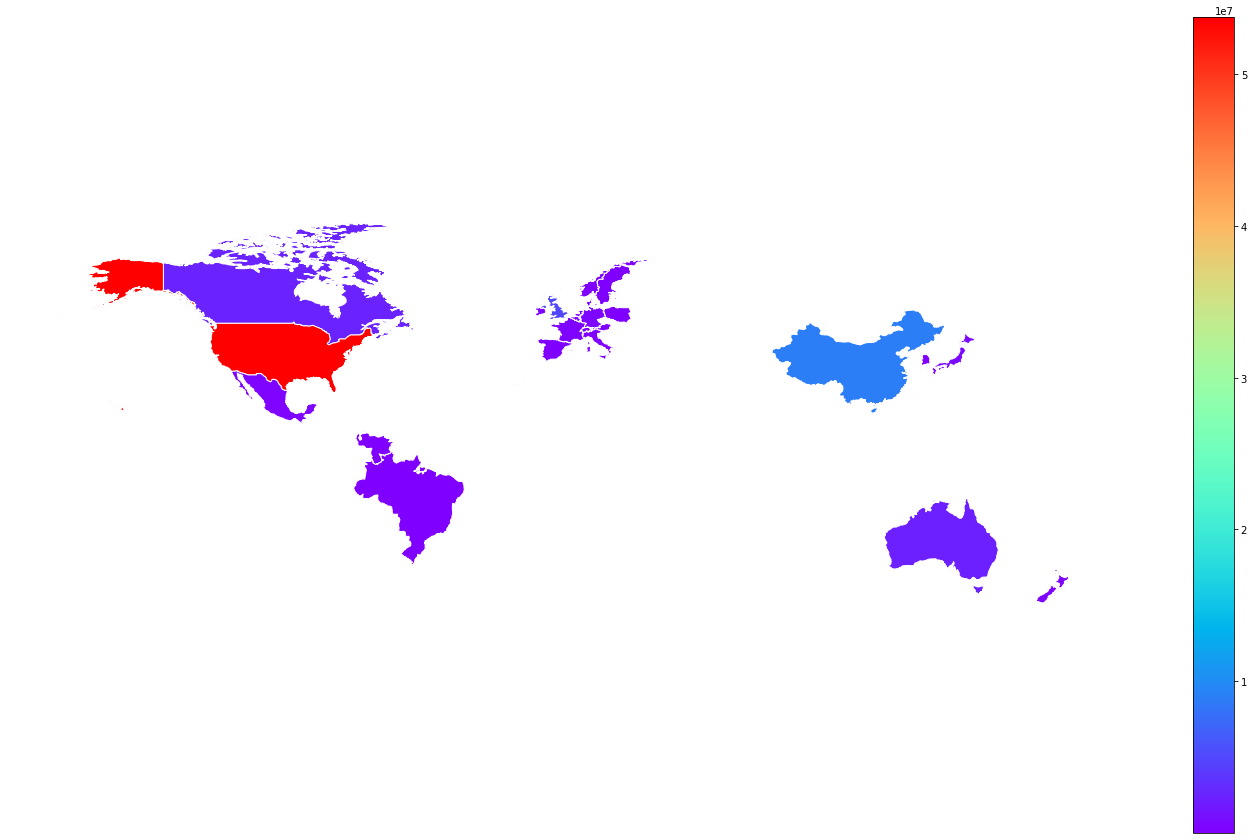

In [9]:
fig, ax = plt.subplots(1, figsize=(25,15))
TSData.plot(column="Sales", 
              cmap="rainbow", 
              linewidth=1, 
              ax=ax,
            edgecolor='1', 
            legend = True)
ax.axis('off')

In [10]:
px.set_mapbox_access_token(open('mapboxtoken.txt').read())

In [13]:
fig = px.choropleth_mapbox(TSData, locations = TSData.index, geojson = TSData.geometry, color = "Sales", 
                            color_continuous_scale="Agsunset", center={"lat":30, "lon":0}, 
                            zoom = 1.1, opacity = 0.6)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, mapbox_style="mapbox://styles/mapbox/dark-v10", paper_bgcolor = '#191A1A')
fig.update_coloraxes(colorbar_bgcolor='#191A1A', colorbar_xpad=10, colorbar_tickfont_color='#DC4790',
                        colorbar_title_font_color='#DC4790', cmin=0)
fig.show()